In [3]:
import pandas as pd
dataset_path = "C:/Users/abdul/Downloads/archive (3)/USvideos.csv"

df = pd.read_csv(dataset_path)

print(df.head())

      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

In [4]:
category_mapping = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    18: "Short Movies",
    19: "Travel & Events",
    20: "Gaming",
    21: "Videoblogging",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "How-to & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism",
    30: "Movies",
    31: "Anime/Animation",
    32: "Action/Adventure",
    33: "Classics",
    34: "Comedy",
    35: "Documentary",
    36: "Drama",
    37: "Family",
    38: "Foreign",
    39: "Horror",
    40: "Sci-Fi/Fantasy",
    41: "Thriller",
    42: "Shorts",
    43: "Shows",
    44: "Trailers",
}

df['category'] = df['category_id'].replace(category_mapping)

print("\nUpdated Data with Category Names:")
print(df.head())


Updated Data with Category Names:
      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
G = nx.DiGraph()

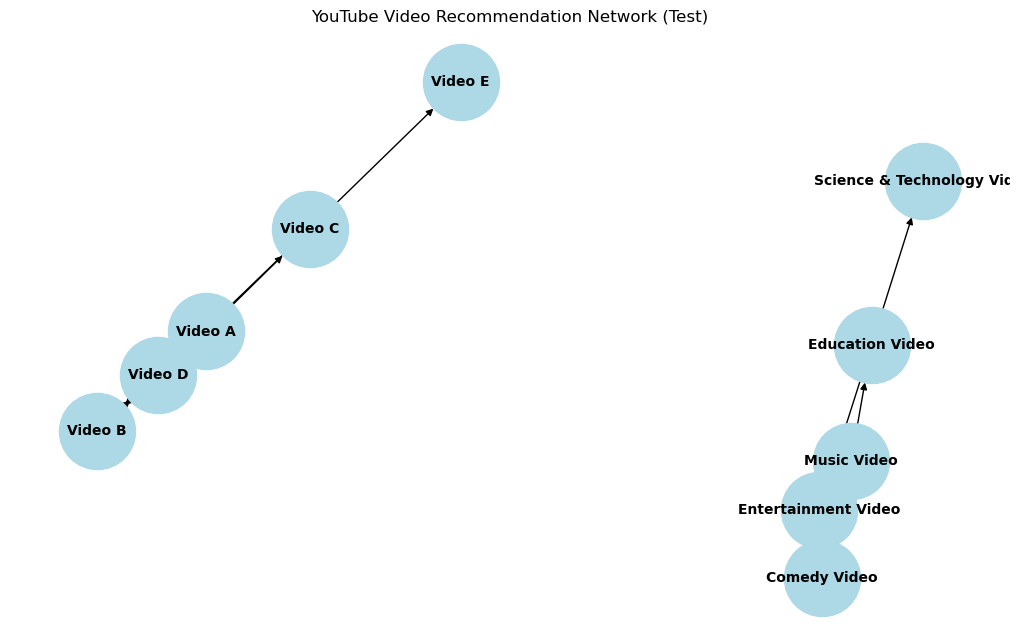

In [12]:
video_recommendations = {
    'Music Video': ['Comedy Video', 'Education Video'],
    'Comedy Video': ['Entertainment Video'],
    'Education Video': ['Entertainment Video', 'Science & Technology Video'],
    'Entertainment Video': ['Music Video'],  # This creates a loop for testing
    'Science & Technology Video': []
}

# Add nodes and edges based on the recommendations
for video, recommendations in video_recommendations.items():
    for recommended_video in recommendations:
        G.add_edge(video, recommended_video)

# Draw the graph (this will create a simple plot of the graph)
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrows=True)
plt.title("YouTube Video Recommendation Network (Test)")
plt.show()

In [7]:
for index, row in df.iterrows():
    video_id = row['video_id']
    # Replace with your actual logic for connecting videos, such as through recommendations or category links
    recommended_videos = df[df['category'] == row['category']]['video_id'].tolist()
    
    for recommended_video in recommended_videos:
        if video_id != recommended_video:
            G.add_edge(video_id, recommended_video)

# Calculate degree centrality
centrality = nx.degree_centrality(G)

# Find top 5 most central nodes (videos)
top_central_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Output the most central videos
for video, score in top_central_nodes:
    print(f"Video ID: {video}, Centrality Score: {score}")

Video ID: a49beT37Bc0, Centrality Score: 0.6696062992125984
Video ID: 6J-D86wfxiE, Centrality Score: 0.6696062992125984
Video ID: P7WRXaxu1u4, Centrality Score: 0.6525984251968504
Video ID: WIWb8f1WIyQ, Centrality Score: 0.5325984251968504
Video ID: IjFxx9SrOTU, Centrality Score: 0.5291338582677165


In [8]:
for index, row in df.iterrows():
    video_id = row['video_id']
    category = row['category']  
    recommended_videos = df[df['category'] == category]['video_id'].tolist()  
    for recommended_video_id in recommended_videos:
        if recommended_video_id != video_id:
            G.add_edge(video_id, recommended_video_id)

centrality = nx.degree_centrality(G)

# Find top 5 most central nodes (videos)
top_central_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]

for video, score in top_central_nodes:
    category = df.loc[df['video_id'] == video, 'category'].values[0]  # Get the category for the video
    print(f"Video ID: {video}, Centrality Score: {score}, Category: {category}")

Video ID: a49beT37Bc0, Centrality Score: 0.6696062992125984, Category: Entertainment
Video ID: 6J-D86wfxiE, Centrality Score: 0.6696062992125984, Category: News & Politics
Video ID: P7WRXaxu1u4, Centrality Score: 0.6525984251968504, Category: Sports
Video ID: WIWb8f1WIyQ, Centrality Score: 0.5325984251968504, Category: Entertainment
Video ID: IjFxx9SrOTU, Centrality Score: 0.5291338582677165, Category: Travel & Events


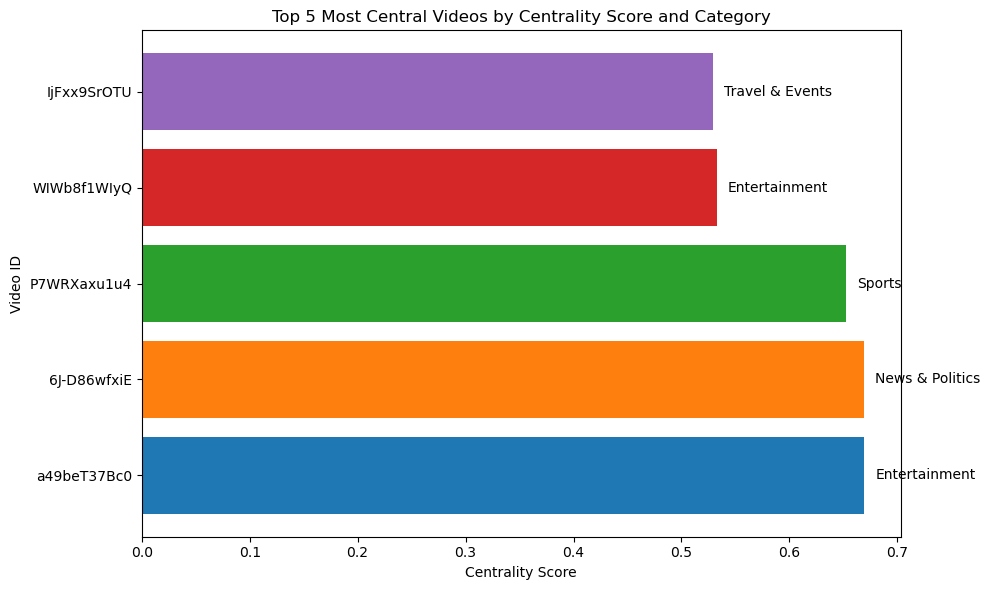

In [9]:
import matplotlib.pyplot as plt

# Data for the top 5 videos
videos = ['a49beT37Bc0', '6J-D86wfxiE', 'P7WRXaxu1u4', 'WIWb8f1WIyQ', 'IjFxx9SrOTU']
centrality_scores = [0.6696, 0.6696, 0.6526, 0.5326, 0.5291]
categories = ['Entertainment', 'News & Politics', 'Sports', 'Entertainment', 'Travel & Events']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(videos, centrality_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Add labels and title
plt.xlabel('Centrality Score')
plt.ylabel('Video ID')
plt.title('Top 5 Most Central Videos by Centrality Score and Category')

# Add category labels next to the bars
for index, value in enumerate(centrality_scores):
    plt.text(value + 0.01, index, categories[index], va='center')

# Display the plot
plt.tight_layout()
plt.show()
